In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\msyeu\Instacart Basket Analysis'

In [3]:
#import data
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'df_ords_prods_merge_customers.pkl'))

In [4]:
df.shape

(23918195, 34)

In [5]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,First_name,Last_name,Gender,State,Age,date_joined,Number_of_dependents,Marital_Status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# Step 2. Create a bar chart, histogram, scatterplot, and a line chart 

<Axes: xlabel='order_dow'>

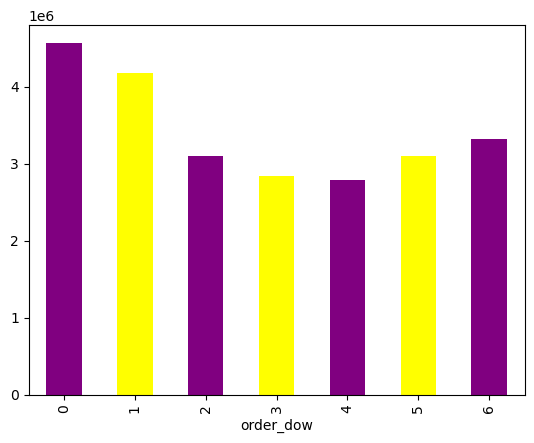

In [6]:
#create a bar chart
df['order_dow'].value_counts().sort_index().plot.bar(color = ['purple', 'yellow', 'purple', 'yellow', 'purple', 'yellow', 'purple'])

<Axes: ylabel='Frequency'>

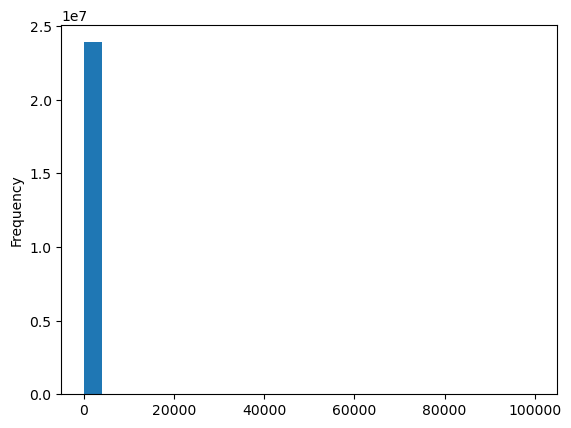

In [7]:
#Create Histogram
df['prices'].plot.hist(bins=25)

<Axes: xlabel='prices', ylabel='prices'>

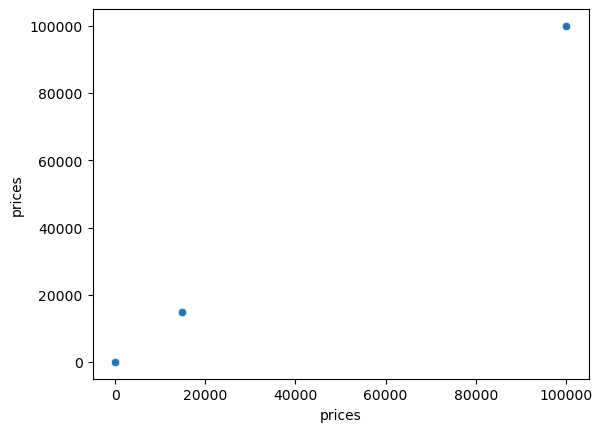

In [8]:
#Create Scatterplot
sns.scatterplot(x='prices', y='prices', data=df)

In [9]:
df.loc[df['prices']>100]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,First_name,Last_name,Gender,State,Age,date_joined,Number_of_dependents,Marital_Status,income
1576,912404,17,12,2,14,5.0,False,21553,5,0,...,Frequent customer,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659
1638,603376,17,22,6,16,4.0,False,21553,3,1,...,Frequent customer,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659
16522,3264360,135,2,2,21,13.0,False,21553,6,0,...,Regular customer,nan,Chen,Female,Maryland,30,3/19/2017,3,married,120635
16528,892534,135,3,0,8,12.0,False,21553,3,1,...,Regular customer,nan,Chen,Female,Maryland,30,3/19/2017,3,married,120635
53672,229704,342,8,1,19,30.0,False,21553,9,0,...,Non-frequent customer,Ruby,Bates,Female,Minnesota,56,8/23/2018,2,married,187328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875841,2908271,151721,3,4,11,30.0,False,21553,10,1,...,Frequent customer,Charles,Nichols,Male,Virginia,40,1/23/2019,0,single,365456
23885045,944056,151804,2,1,12,30.0,False,21553,4,0,...,Non-frequent customer,Ruth,Sosa,Female,North Carolina,72,5/13/2019,0,divorced/widowed,188793
23897385,3357662,151868,5,0,13,15.0,False,21553,4,0,...,Regular customer,Jonathan,Hawkins,Male,South Carolina,39,8/5/2018,3,married,382018
23897399,622866,151868,7,6,12,21.0,False,21553,3,1,...,Regular customer,Jonathan,Hawkins,Male,South Carolina,39,8/5/2018,3,married,382018


In [10]:
df.loc[df['prices']>100, 'prices'] = np.nan

In [11]:
df['prices'].max()

25.0

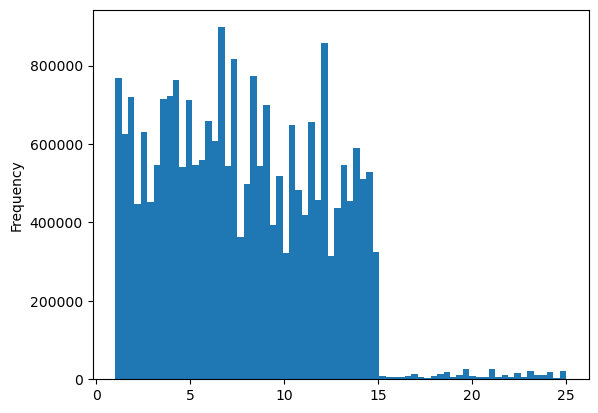

In [12]:
#retry histogram
hist = df['prices'].plot.hist(bins=70)

In [13]:
#create a list holding true/false values 
dev = np.random.rand(len(df))<=0.7

In [14]:
#Store 70% of sample in big
big = df[dev]

In [15]:
#Store 30% of sample in samll
small = df[~dev]

In [16]:
len(df)

23918195

In [17]:
len(big)+len(small)

23918195

In [18]:
df_2 = small[['order_dow', 'prices']]

C:\Users\msyeu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msyeu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


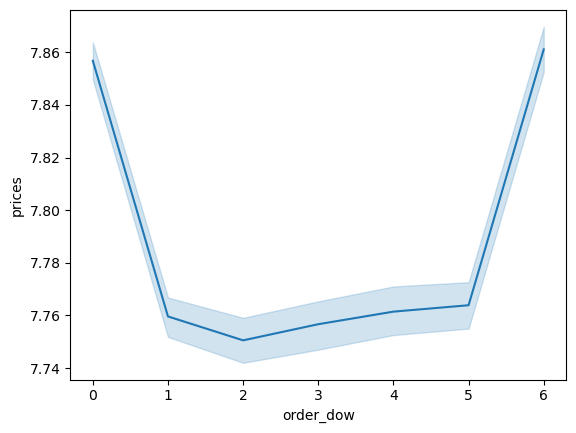

In [19]:
line = sns.lineplot(data = df_2, x='order_dow', y='prices')

# Step 3. Provide Instacart Senior Stakeholders with descriptive findings about sales. 

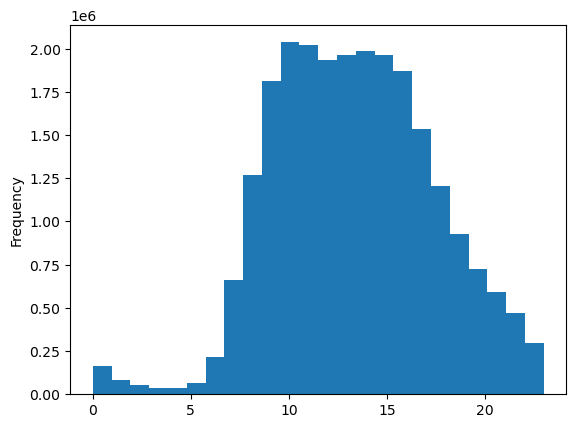

In [20]:
#Create histogram
hist_hour = df['order_hour_of_day'].plot.hist(bins=24)

The above histogram demonstrates the number of hours of the day (0-23) and the total amount of orders placed for each hour in millions. 

In [21]:
#Checking the histogram accuracy
df['order_hour_of_day'].value_counts(dropna=False).sort_index()

order_hour_of_day
0      161914
1       84061
2       51234
3       37247
4       38923
5       64788
6      213047
7      658825
8     1268701
9     1810519
10    2036438
11    2019440
12    1933480
13    1964787
14    1985727
15    1963384
16    1868518
17    1536352
18    1207264
19     929401
20     722233
21     593153
22     471264
23     297495
Name: count, dtype: int64

# Step 4. Create a bar chart from the loyalty_flag column. 

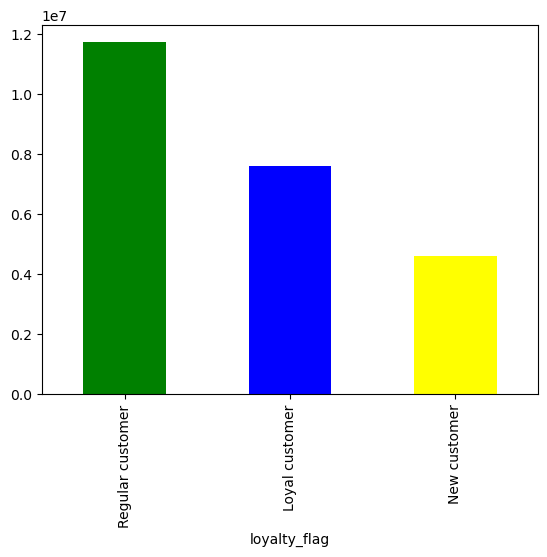

In [22]:
#Making a bar chart from loyalty flag column
loyalty_bar = df['loyalty_flag'].value_counts().plot.bar(color = ['green', 'blue', 'yellow'])

# Step 5. Check whether there's a difference in expenditures depending on the hour of the day. 

In [23]:
df_prices_hour = small[['order_hour_of_day', 'prices']]

C:\Users\msyeu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msyeu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


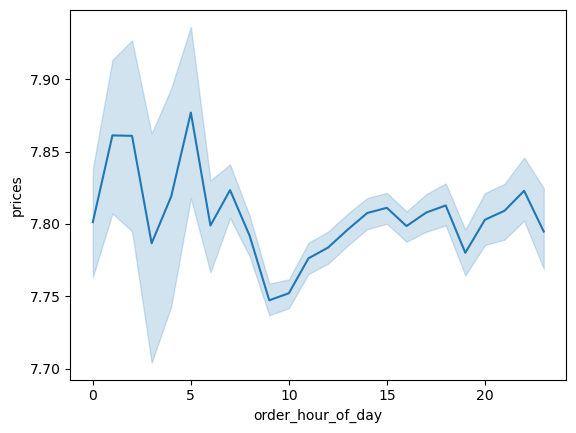

In [24]:
#creating a line chart
line2 = sns.lineplot(data = df_prices_hour, x = 'order_hour_of_day', y='prices')

# Step 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:In a markdown cell beneath your line chart, describe what the line chart shows.

In [26]:
df_fam_status_age = small [['Number_of_dependents', 'Age']]

C:\Users\msyeu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msyeu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


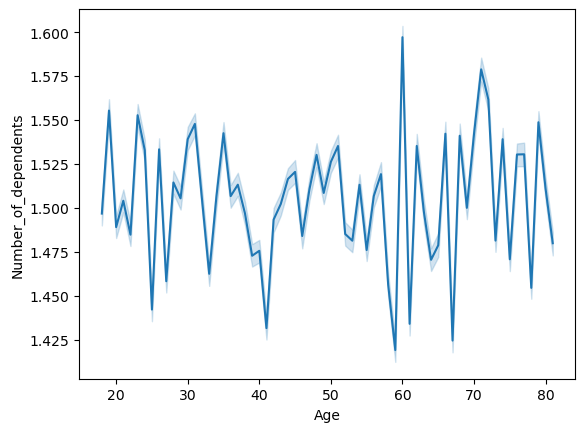

In [27]:
line3 = sns.lineplot(data = df_fam_status_age, x = 'Age', y = 'Number_of_dependents')

The line chart shows the relationship between the customer's age and the number of dependents in each customer's family. 

# Step 7 .You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [29]:
df_income_age = small [['income', 'Age']]

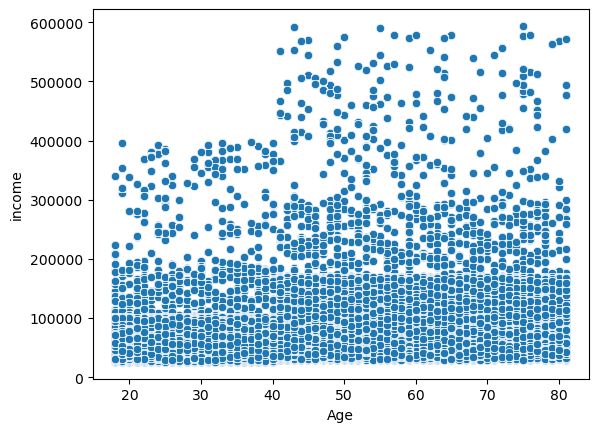

In [30]:
spending_plot = sns.scatterplot(data = df_income_age, x = 'Age', y = 'income')


The scatterplot showing the relationship between age and spending power (income) of Instacart customers. Based on the scatterplot, there is a large concetration of customer across all ages that earns up to 200,000 (USD) and customers who are 40 years and older are earning up to 600,000 (USD). So, customers who are 40 years and older might spend more because of their higher income. 

# Step 8 - Export your visualizations as ".png" files in your relevant project folder. 

In [31]:
hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hist.png'))

In [32]:
line.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line.png'))

In [34]:
hist_hour.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hist_hour.png'))

In [35]:
loyalty_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_bar.png'))

In [36]:
line2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_prices_hour_of_day.png'))

In [37]:
line3.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_age_dependents.png'))

In [38]:
spending_plot.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'spending_plot.png'))